# **Import Required Packages**
You'll need Python (3.7+) and the following libraries:
* `torch`
* `transformers`
* `diffusers`
* `Pillow` (image display)
* `gradio` (simple UI)

In [1]:
import subprocess
import sys
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'gradio'])
# For simple UI
import gradio

In [2]:
import torch
import transformers
# For displaying image
from PIL import Image
from diffusers import StableDiffusionPipeline

# **Set Up Model**

Load the `stable-diffusion-v-1-4-original` Stable Diffusion model from Hugging Face. Note: Internet connection is required to download the model weights.

Floating-point precision (FP16) can reduce computation time by halving the number of bits used for model weights. Many modern GPUs (like RTX 30xx and A100) handle FP16 operations very efficiently.

We also want to move to using a GPU as it will make Stable Diffusion significantly faster than CPU. Thus, if you are using Google Colab, go to `Runtime -> Change Runtime Type` and select `T4 GPU`.

In [12]:
# Load the pre-trained Stable Diffusion model: https://huggingface.co/CompVis/stable-diffusion-v1-4
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

# Move model to GPU (if possible)
if torch.cuda.is_available():
    print("CUDA is available. Using GPU.")
    pipe = pipe.to("cuda")
else:
    print("CUDA is not available. Using CPU.")
    pipe = pipe.to("cpu")

# Generate an image from a text prompt
def generate_image(prompt, num_inference_steps=100, height=512, width=512):
    with torch.no_grad():
        image = pipe(prompt, num_inference_steps=num_inference_steps, height=height, width=width).images[0]
    return image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

CUDA is available. Using GPU.


# **Test Image Generation**

Let's test the image generation by passing a random text prompt to the `generate_image` function.

In [10]:
# Test image generation
prompt = "A serene landscape with a crystal-clear lake surrounded by towering snow-capped mountains, under a sky filled with soft pink and purple hues during sunset."
# Generate an image
image = generate_image(prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

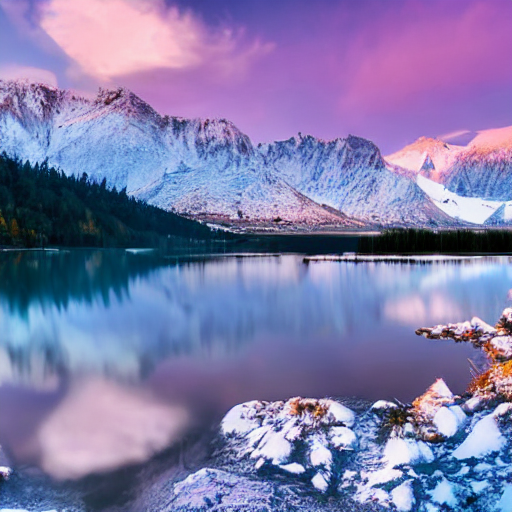

In [11]:
# Display the generated image
display(image)

# **Create a Web Interface (using Gradio)**

To allow users to input text prompts via a simple web interface, we will use Gradio.

In [13]:
# Define a function for Gradio UI
def generate_image_gradio(prompt):
    image = generate_image(prompt)
    return image

# Create a Gradio interface
interface = gradio.Interface(
    fn=generate_image_gradio,
    inputs=gradio.Textbox(label="Enter your prompt", placeholder="A detailed description of the image..."),
    outputs=gradio.Image(label="Generated Image"),
    title="Text-to-Image Generator",
    description="Generate images from text prompts using stable diffusion v1.4."
)

# Launch the Gradio app
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1125dc91b0fbc270b6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
